In [50]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import pandas as pd

df = pd.read_csv("advertising.csv")

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [56]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows.index)

Index([], dtype='int64')


In [57]:
print(df['Sales'].max())
print(df['Sales'].min())

27.0
1.6


In [58]:
target=[]
for sale in df['Sales'].values:
    if(sale>15):
        target.append('High')
    else:
        target.append('Low')
        
df = df.drop(columns='Sales')
df['Sales']=target
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,High
1,44.5,39.3,45.1,Low
2,17.2,45.9,69.3,Low
3,151.5,41.3,58.5,High
4,180.8,10.8,58.4,High


In [48]:
df['Sales'] = df['Sales'].apply(lambda x: 'High' if x > 15 else 'Low')

In [49]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,High
1,44.5,39.3,45.1,Low
2,17.2,45.9,69.3,Low
3,151.5,41.3,58.5,High
4,180.8,10.8,58.4,High


In [59]:
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [61]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=1000, criterion='entropy')
model1.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [62]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100, criterion='entropy')
model2.fit(X, y)

RandomForestClassifier(criterion='entropy')

In [65]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=10, criterion='entropy')
model3.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [68]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=3, criterion='entropy')
model4.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [69]:
from sklearn.metrics import accuracy_score

pred1=model1.predict(X)
pred2=model2.predict(X)
pred3=model3.predict(X)
pred4=model4.predict(X)

print(accuracy_score(pred1, y))
print(accuracy_score(pred2, y))
print(accuracy_score(pred3, y))
print(accuracy_score(pred4, y))

1.0
1.0
0.995
1.0


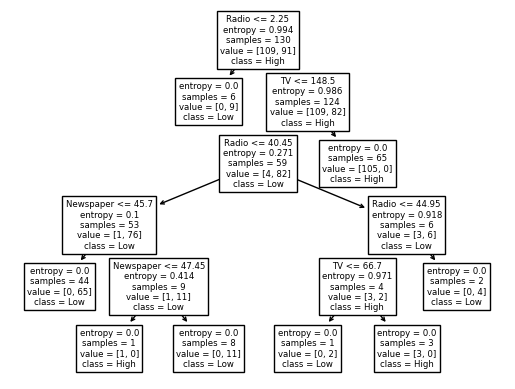

In [75]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree0=model1.estimators_[0]

plot_tree(tree0, feature_names=list(X.columns), class_names=['High', 'Low'])
plt.show()

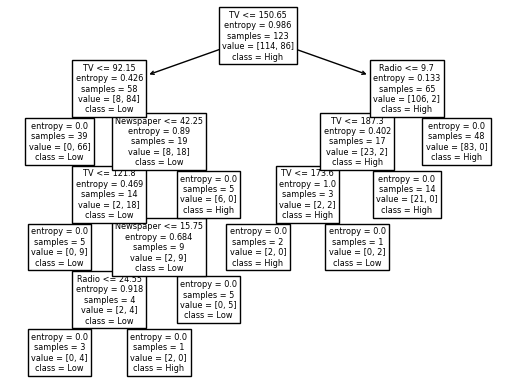

In [78]:
tree0=model3.estimators_[1]

plot_tree(tree0, feature_names=list(X.columns), class_names=['High', 'Low'])
plt.show()